In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False


# eseaesas

In [2]:
df1 = pd.read_csv(r'C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\order_train1.csv', encoding='gbk')
df2 = pd.read_csv(r'C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\predict_sku1.csv', encoding='gbk')

data = df1[df1[['sales_region_code', 'item_code', 'first_cate_code', 'second_cate_code']].apply(tuple, axis=1).isin(
    df2[['sales_region_code', 'item_code', 'first_cate_code', 'second_cate_code']].apply(tuple, axis=1))]

In [3]:
## Data Preparation
# Remove outliers from the 'ord_qty' column

def remove_outliers(df, col_name):
   q1 = df[col_name].quantile(0.25)
   q3 = df[col_name].quantile(0.75)
   iqr = q3 - q1
   lower_bound = q1 - 1.5 * iqr
   upper_bound = q3 + 1.5 * iqr
   df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
   return df

data_without_outliers = remove_outliers(data, 'ord_qty')
# Boxplot before and after removing outliers

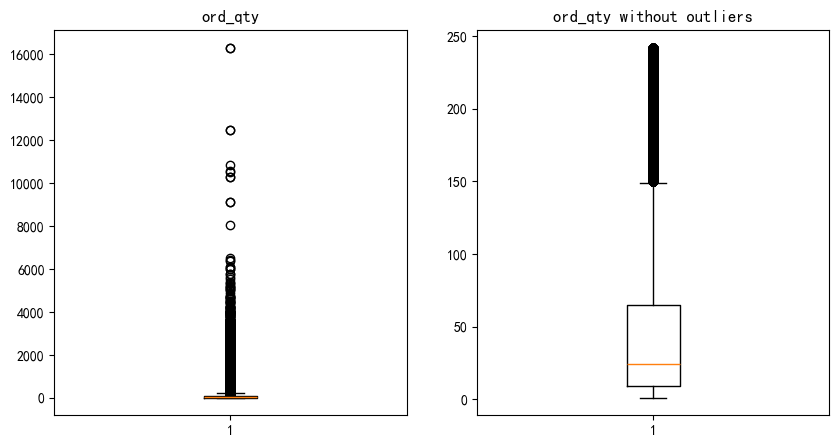

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(data['ord_qty'])
axs[0].set_title('ord_qty')
axs[1].boxplot(data_without_outliers['ord_qty'])
axs[1].set_title('ord_qty without outliers')
plt.show()


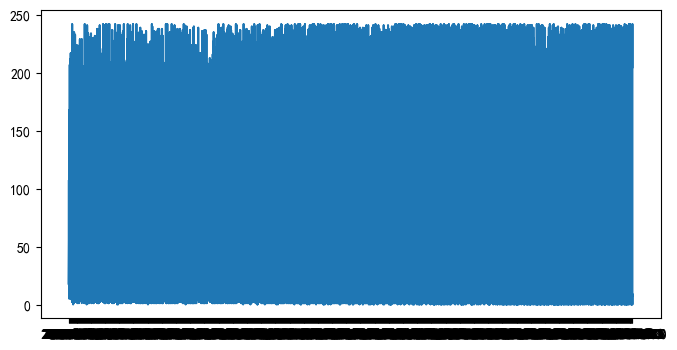

In [5]:
# Graph of Demand
data_without_outliers.index = pd.to_datetime(data_without_outliers.index)
plt.figure(figsize=(8,4))
plt.plot(data_without_outliers['order_date'],data_without_outliers['ord_qty'])
plt.show()


In [6]:

data_without_outliers = data.copy()
data_without_outliers['order_date'] = pd.to_datetime(
    data_without_outliers['order_date'])
data_without_outliers = data_without_outliers.set_index('order_date')


C:\Users\Aaron\AppData\Local\Temp\ipykernel_21584\4067231767.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax3.plot(data_without_outliers['ord_qty'].resample('M').sum(),linewidth=1)


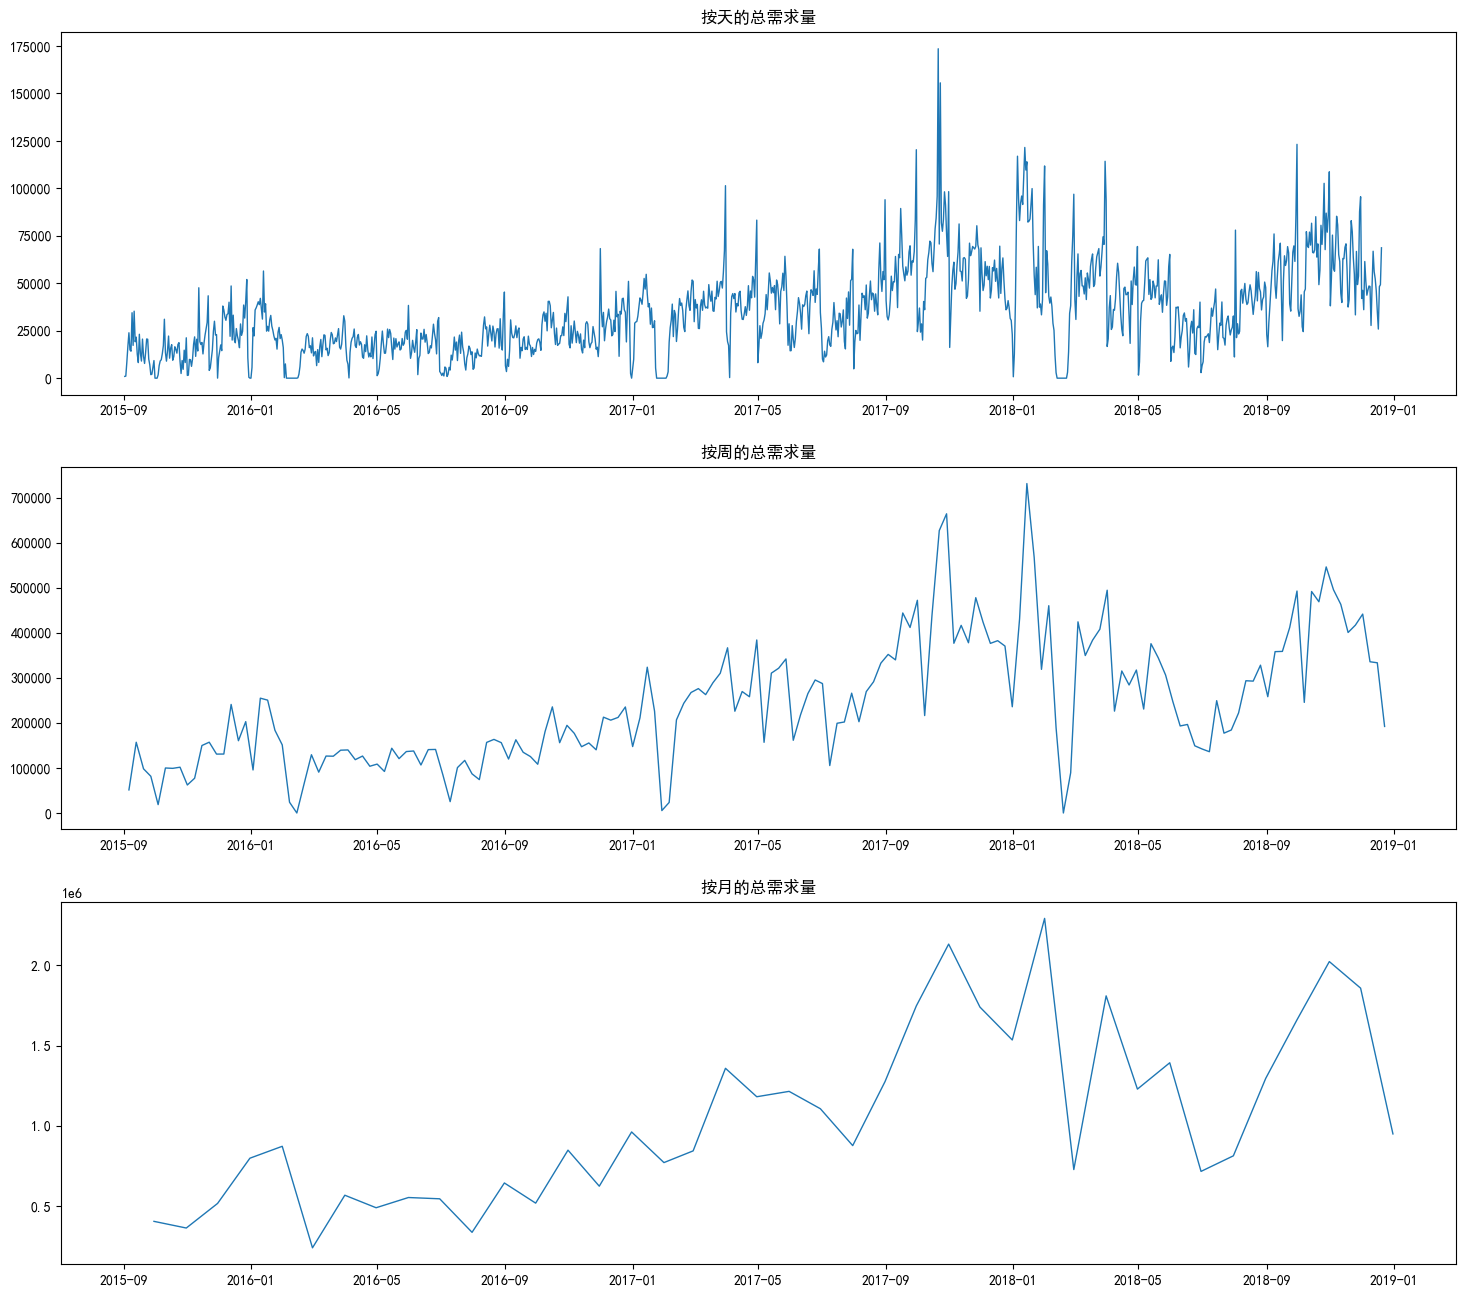

In [7]:
fig = plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.2)
ax1 = fig.add_subplot(3,1,1)
ax1.plot(data_without_outliers['ord_qty'].resample('D').sum(), linewidth=1)
ax1.set_title('Total Demand per Day')
ax1.tick_params(axis='both', which='major')
ax2 = fig.add_subplot(3,1,2, sharex=ax1)
ax2.plot(data_without_outliers['ord_qty'].resample('W').sum(), linewidth=1)
ax2.set_title('Total Demand per Week')
ax2.tick_params(axis='both', which='major')
ax3 = fig.add_subplot(3,1,3, sharex=ax1)
ax3.plot(data_without_outliers['ord_qty'].resample('M').sum(), linewidth=1)
ax3.set_title('Total Demand per Month')
ax3.tick_params(axis='both', which='major')
plt.show() 


In [8]:

d = data_without_outliers.groupby(['sales_region_code', 'item_code', 'first_cate_code', 'second_cate_code'])[
    'ord_qty'].resample('D').sum().reset_index()
d = d.loc[d['ord_qty'] != 0]
print(d)
w = data_without_outliers.groupby(['sales_region_code', 'item_code', 'first_cate_code', 'second_cate_code'])[
    'ord_qty'].resample('W').sum().reset_index()
w = w.loc[w['ord_qty'] != 0]
m = data_without_outliers.groupby(['sales_region_code', 'item_code', 'first_cate_code', 'second_cate_code'])[
    'ord_qty'].resample('M').sum().reset_index()
m = m.loc[m['ord_qty'] != 0]

pd.DataFrame(d).to_csv(r"C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\day.csv", index=False)
pd.DataFrame(w).to_csv(r"C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\week.csv", index=False)
pd.DataFrame(m).to_csv(r"C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\month.csv", index=False)


         sales_region_code  item_code  first_cate_code  second_cate_code  \
0                      101      20002              303               406   
222                    101      20002              303               406   
224                    101      20002              303               406   
233                    101      20002              303               406   
239                    101      20002              303               406   
...                    ...        ...              ...               ...   
1040781                105      22084              302               408   
1040799                105      22084              302               408   
1040809                105      22084              302               408   
1040817                105      22084              302               408   
1040833                105      22084              302               408   

        order_date  ord_qty  
0       2017-08-04        4  
222     2018-03-14        2

C:\Users\Aaron\AppData\Local\Temp\ipykernel_21584\2020750002.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'ord_qty'].resample('M').sum().reset_index()


In [9]:
df = pd.read_csv(r"C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\day.csv")
df

,sales_region_code,item_code,first_cate_code,second_cate_code,order_date,ord_qty
0,101,20002,303,406,2017-08-04,4
1,101,20002,303,406,2018-03-14,2
2,101,20002,303,406,2018-03-16,3
3,101,20002,303,406,2018-03-25,3
4,101,20002,303,406,2018-03-31,9
...,...,...,...,...,...,...
257033,105,22084,302,408,2018-08-25,10
257034,105,22084,302,408,2018-09-12,106
257035,105,22084,302,408,2018-09-22,5
257036,105,22084,302,408,2018-09-30,11


In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [11]:
# Data preprocessing
# Split training set and test set
X = df.drop('ord_qty', axis=1)
y = df['ord_qty']
c = y.mean()
d = y.std()

# Save c and d value
np.save(r'C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\c.npy', c)
np.save(r'C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\d.npy', d)

y = (y - c) / d

In [12]:
# For categorical data, use one-hot encoding for processing
X = pd.get_dummies(X, columns=['sales_region_code', 'item_code', 'first_cate_code', 'second_cate_code'])
# Convert time-type variables into numeric variables
X['order_date'] = pd.to_datetime(X['order_date'])
X['year'] = X['order_date'].dt.year
X['month'] = X['order_date'].dt.month
X['quarter'] = X['order_date'].dt.quarter
X.drop('order_date', axis=1, inplace=True)

a = X.mean()
b = X.std()

# Save a and b values
np.save(r'C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\a.npy', a)
np.save(r'C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\b.npy', b)

X = (X - a) / b



In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.08, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, r'C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\tmp\model.pkl')


GradientBoostingRegressor(learning_rate=0.08, max_depth=6, n_estimators=150,
                          random_state=42)

In [14]:
# Model evaluation
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r_train = r2_score(y_train, y_pred_train)

y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r_test = r2_score(y_test, y_pred_test)

print('Training set mean squared error MSE:', mse_train)
print('Training set root mean squared error RMSE:', rmse_train)
print('Training set R2 score:', r_train)
print('Test set mean squared error MSE:', mse_test)
print('Test set root mean squared error RMSE:', rmse_test)
print('Test set R2 score:', r_test)


训练集均方误差MSE： 0.7348886858188025
训练集均方根误差RMSE： 0.8572564877671107
训练集决定系数R2： 0.2635732896957512
测试集均方误差MSE： 0.7696178184442884
测试集均方根误差RMSE： 0.8772786435587546
测试集决定系数R2： 0.23673295208984968


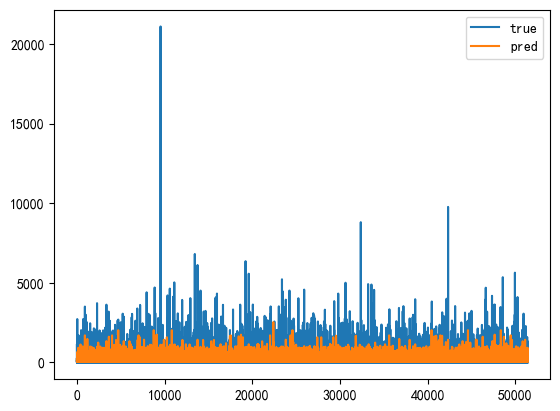

In [15]:
# Comparison chart of predicted values and true values for the test set

y_test = y_test * d + c
y_pred = y_pred_test * d + c
plt.plot(y_test.values, label='true')
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()

In [17]:
df = pd.read_csv(r"C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\month.csv")
df

,sales_region_code,item_code,first_cate_code,second_cate_code,order_date,ord_qty
0,101,20002,303,406,2017-08-31,4
1,101,20002,303,406,2018-03-31,17
2,101,20002,303,406,2018-04-30,124
3,101,20002,303,406,2018-05-31,110
4,101,20002,303,406,2018-06-30,77
...,...,...,...,...,...,...
30819,105,22084,302,408,2017-12-31,16
30820,105,22084,302,408,2018-01-31,17
30821,105,22084,302,408,2018-08-31,173
30822,105,22084,302,408,2018-09-30,122


In [18]:
# Data preprocessing
# Split the data into training and testing sets

X = df.drop('ord_qty', axis=1)
y = df['ord_qty']
c1 = y.mean()
d1 = y.std()

# Save c and d values
np.save(r'C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\c1.npy', c1)
np.save(r'C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\d1.npy', d1)
y = (y - c1) / d1


In [19]:
# For categorical data, use one-hot encoding
X = pd.get_dummies(X, columns=['sales_region_code', 'item_code', 'first_cate_code', 'second_cate_code'])

# Convert time-related variables into numeric variables
X['order_date'] = pd.to_datetime(X['order_date'])
X['year'] = X['order_date'].dt.year
X['month'] = X['order_date'].dt.month
X['quarter'] = X['order_date'].dt.quarter
X.drop('order_date', axis=1, inplace=True)

a1 = X.mean()
b1 = X.std()

# Save a and b values to the specified path
np.save(r'C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\a1.npy', a1)
np.save(r'C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\b1.npy', b1)

X = (X - a1) / b1

In [27]:
model_dir = r'C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\tmp'
os.makedirs(model_dir, exist_ok=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.08, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Save the model
model_path = os.path.join(model_dir, 'model_month.pkl')
joblib.dump(model, model_path)

['C:\\Users\\Aaron\\Desktop\\Data Analysis and Demand Forecasting for Product Orders\\tmp\\model_month.pkl']

In [21]:
# Model evaluation
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r_train = r2_score(y_train, y_pred_train)

y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r_test = r2_score(y_test, y_pred_test)

print('Training set mean squared error MSE:', mse_train)
print('Training set root mean squared error RMSE:', rmse_train)
print('Training set R2 score:', r_train)
print('Test set mean squared error MSE:', mse_test)
print('Test set root mean squared error RMSE:', rmse_test)
print('Test set R2 score:', r_test)


Training set mean squared error MSE: 0.3238078735863478
Training set root mean squared error RMSE: 0.5690411879524608
Training set R2 score: 0.6913676251507997
Test set mean squared error MSE: 0.40153638374400513
Test set root mean squared error RMSE: 0.6336689859414023
Test set R2 score: 0.49983854868617916


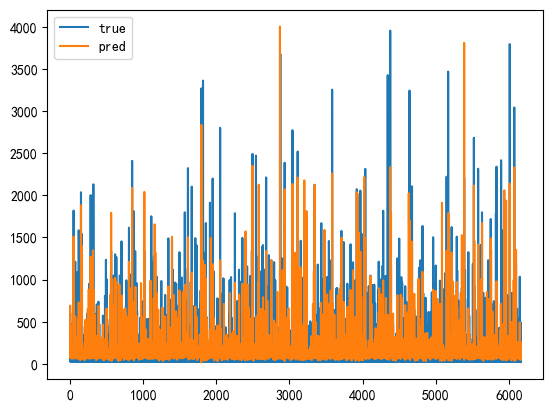

In [22]:
# Comparison chart of predicted values and true values for the test set

y_test = y_test * d + c
y_pred = y_pred_test * d + c
plt.plot(y_test.values, label='true')
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()

In [28]:
# Read the prediction data
pred_df = pd.read_csv(r'C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\predict_sku1.csv', encoding='gbk')
df = pd.read_csv(r'C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\month.csv', encoding='gbk')

# Select rows from pred_df where 'sales_region_code', 'item_code', 'first_cate_code', 'second_cate_code' match with the same columns in df
pred1 = pred_df[pred_df[['sales_region_code', 'item_code', 'first_cate_code', 'second_cate_code']].apply(tuple, axis=1).isin(df[['sales_region_code', 'item_code', 'first_cate_code', 'second_cate_code']].apply(tuple, axis=1))]

# Select rows from pred_df that do not match the selected rows in pred1
no = pred_df.loc[~pred_df[['sales_region_code', 'item_code', 'first_cate_code', 'second_cate_code']].apply(tuple, axis=1).isin(pred1[['sales_region_code', 'item_code', 'first_cate_code', 'second_cate_code']].apply(tuple, axis=1))]

In [ ]:
# For categorical data, use one-hot encoding
pred = pred1.copy()
pred = pd.get_dummies(pred, columns=['sales_region_code', 'item_code', 'first_cate_code', 'second_cate_code'])

In [ ]:
# Load a, b, c, and d values
a = np.load(r'C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\a1.npy')
b = np.load(r'C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\b1.npy')
c = np.load(r'C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\c1.npy')
d = np.load(r'C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\d1.npy')

In [ ]:
# April
pred4 = pred.copy()
pred4['year'] = 2019
pred4['month'] = 4
pred4['quarter'] = 2
pred4 = (pred4 - a) / b

# May
pred5 = pred.copy()
pred5['year'] = 2019
pred5['month'] = 5
pred5['quarter'] = 2
pred5 = (pred5 - a) / b

# June
pred6 = pred.copy()
pred6['year'] = 2018
pred6['month'] = 6
pred6['quarter'] = 4
pred6 = (pred6 - a) / b


In [ ]:
# Load the model
model = joblib.load(r'C:\Users\Aaron\Desktop\Data Analysis and Demand Forecasting for Product Orders\tmp\model_month.pkl')


In [ ]:
# Predict demand for April
y_pred4 = model.predict(pred4)
y_pred4 = y_pred4 * d + c  # Adjust predictions with scaling factors
print('April Predicted Demand:\n', y_pred4)

# Predict demand for May
y_pred5 = model.predict(pred5)
y_pred5 = y_pred5 * d + c  # Adjust predictions with scaling factors

# Predict demand for June
y_pred6 = model.predict(pred6)
y_pred6 = y_pred6 * d + c  # Adjust predictions with scaling factors



In [ ]:
# Save the prediction results to a file
result_df = pred1.copy()
result_df['Predicted Demand for April 2019'] = y_pred4
result_df['Predicted Demand for May 2019'] = y_pred5
result_df['Predicted Demand for June 2019'] = y_pred6


In [ ]:
# Replace missing product codes with the mean values of predicted demand grouped by 'sales_region_code', 'first_cate_code', and 'second_cate_code'
final = result_df.groupby(['sales_region_code', 'first_cate_code', 'second_cate_code']).agg({
    'Predicted Demand for April 2019': np.mean,
    'Predicted Demand for May 2019': np.mean,
    'Predicted Demand for June 2019': np.mean
}).reset_index()

# Merge the 'no' DataFrame with the 'buchong' DataFrame to fill in missing values
final = pd.merge(no, final, on=['sales_region_code', 'first_cate_code', 'second_cate_code'], how='left')

# Display the result
final


In [ ]:
# Merge the DataFrames
result = pd.concat([result_df, bu]).drop(['first_cate_code', 'second_cate_code'], axis=1)

# Round the predicted demand values to 0 decimal places
result = pd.concat([result_df, bu]).drop(['first_cate_code', 'second_cate_code'], axis=1)
 = he.round({
    'Predicted Demand for April 2019': 0, 
    'Predicted Demand for May 2019': 0, 
    'Predicted Demand for June 2019': 0
})

# Print the result to check
print(result)

# Save the final result to an Excel file
result.to_excel('../result.xlsx', index=False)